목차

I. 프로젝트 준비단계

II. 프로젝트 - Movielens 영화 추천 실습

루브릭 평가 기준

1. CSR matrix가 정상적으로 만들어졌다.

사용자와 아이템 개수를 바탕으로 정확한 사이즈로 만들었다.
2. MF 모델이 정상적으로 훈련되어 그럴듯한 추천이 이루어졌다.

사용자와 아이템 벡터 내적수치가 의미있게 형성되었다.
3. 비슷한 영화 찾기와 유저에게 추천하기의 과정이 정상적으로 진행되었다.



소감

영화에 관심이 없어서 나한테 맞는 것을 찾아주었는지 의문이 든다.
그리고 뭔가 시리즈를 연결해준 느낌도 난다. 
내가 좋아하는 영화가 여기에는 없는것 같아서 그런지 Toy Story를 넣었다는 이유로 애니들이 마구 나오고 있다. 
자연어처리는 어려우며 다시한번 CV를 선택하는 방향으로 나를 이끈다. 

# 프로젝트 준비단계

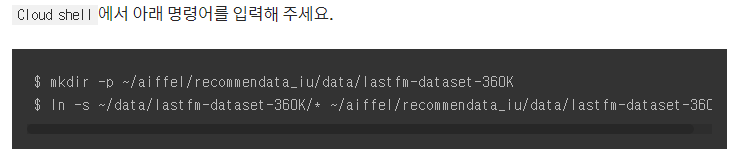

## 1. 데이터 탐색하기와 전처리

### 1-1. 데이터 준비

우리가 다룰 데이터는 tsv 파일
어떻게 생긴 파일????
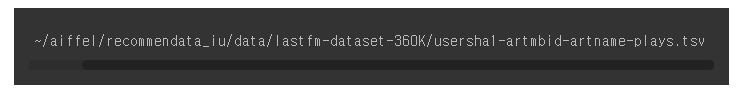

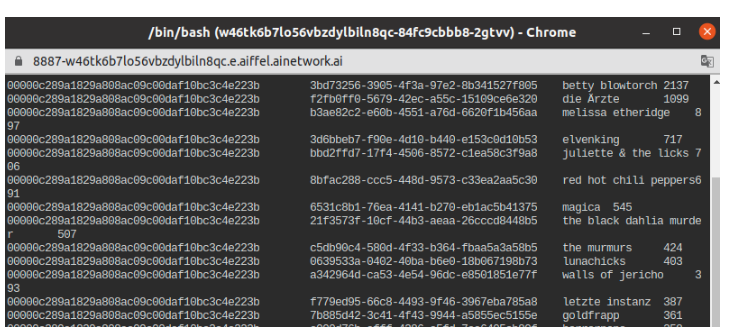

In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [2]:
#artist_MBID 항목은 우리의 관심사가 아닙니다. 사용하는 컬럼만 남기고 제거하도록 하겠습니다.
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [3]:
#검색을 쉽게 하기 위해 아티스트 문자열을 소문자로 바꿔 줍시다
data['artist'] = data['artist'].str.lower() # 검색을 쉽게 하기 위해 아티스트 문자열을 소문자로 바꿔줍시다.
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [4]:
#첫 번째 유저가 어떤 아티스트의 노래를 듣는지 확인해 봅시다.

condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


## 1-2. 데이터 탐색

추천 모델을 만들기 전에 데이터의 기본적인 정보를 보고 갑시다. 아래 항목들을 확인해 보고 싶습니다.

**유저 수, 아티스트 수, 인기 많은 아티스트**

**유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계**

**유저 play 횟수 중앙값에 대한 통계**

In [5]:
# 유저 수
data['user_id'].nunique()

358868

In [6]:
# 아티스트 수
data['artist'].nunique()

291346

In [7]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [8]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [9]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

## 1-3. 모델 검증을 위한 사용자 초기 정보 세팅

우리가 만든 추천 시스템의 추후 검증 과정을 위해, '나는 A를 좋아한다.'라는 정보를 위 데이터셋에 5개 이상 추가해 주어야 합니다

In [10]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


## 1-4. 모델에 활용하기 위한 전처리 

우리가 다루는 데이터에서는 user와 artist 각각에 번호를 붙이고 싶습니다. 

보통 이런 작업을 indexing이라고 합니다. 추천 시스템, 자연어 처리에서 자주 하는 작업들이라 직접 해보시면 좋겠습니다.

In [11]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [13]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [98]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
title column indexing OK!!


,user_id,counts,title
0,0,5,0
1,0,3,1
2,0,3,2
3,0,4,3
4,0,5,4
...,...,...,...
836478,6039,5,3628
836479,6039,5,3629
836480,6039,5,3630
836481,6039,5,3631


## 2.사용자의 명시적/암묵적 평가

우리의 추천 시스템은 사용자들이 아이템을 얼마나 선호하는지를 모델링 하기를 원합니다. 

그러자면 사용자의 아이템 선호도를 말해 주는 유저 행동 데이터셋이 필요합니다. 

만약 우리 데이터가 좋아요나 별점처럼 선호도를 명시적(explicit)으로 나타내는 것이라면 참 좋겠지만, 

**지금 우리가 가지고 있는 데이터는 사용자가 아티스트의 곡을 몇 번 플레이했나 하는 것뿐입니다.**

이렇게 서비스를 사용하면서 자연스럽게 발생하는 암묵적(implicit)인 피드백도 사용자의 아이템에 대한 평가를 알 수 있는 단서가 될 수 있습니다.

In [14]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147740,17535660
Ratio of only_one over all data is 0.84%


우리가 앞으로 만들어갈 모델에서는 암묵적 데이터의 해석을 위해 다음과 같은 규칙을 적용할 것입니다.

* 한 번이라도 들었으면 선호한다고 판단한다.
* 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

## 3. Matrix Factorization(MF)

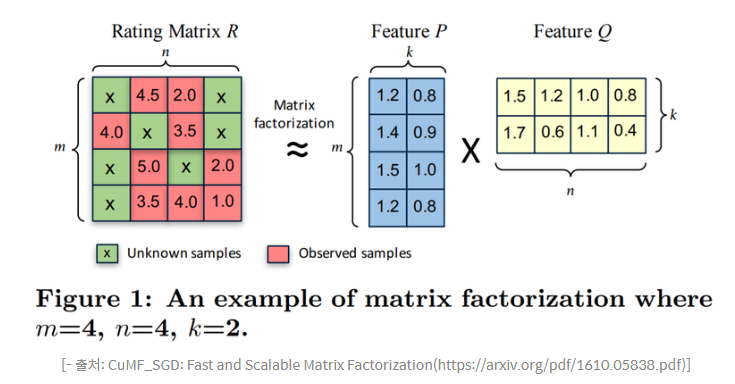

## 4. CSR(Compressed Sparse Row) Matrix
CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조입니다.

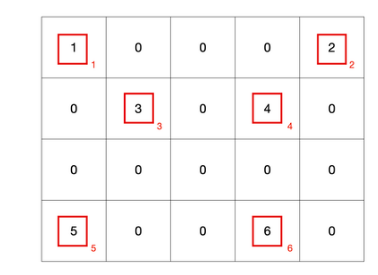

data = [1, 2, 3, 4, 5, 6]

indices = [0, 4, 1, 3, 0, 3]

indptr = [0, 2, 4, 4, 6]

In [15]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

## 5.MF 모델 학습하기

이전 스텝에서 설명한 Matrix Factorization 모델을 implicit 패키지를 사용하여 학습해 봅시다.

implicit 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지입니다.

이 패키지에 구현된 als(AlternatingLeastSquares) 모델을 사용하겠습니다.

Matrix Factorization에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 

한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있습니다.

In [16]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

AlternatingLeastSquares 클래스의 __init__ 파라미터를 살펴보겠습니다.

factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지

regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지

use_gpu : GPU를 사용할 것인지

iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지

1과 4를 늘릴수록 학습 데이터를 잘 학습하게 되지만 과적합의 우려가 있으니 좋은 값을 찾아야 합니다.

In [17]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [18]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [19]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

모델 학습이 끝났습니다! 이제 2가지를 아래 사항을 살펴보도록 하겠습니다

1> Zimin 벡터와 black eyed peas의 벡터를 어떻게 만들고 있는지

2> 두 벡터를 곱하면 어떤 값이 나오는지

In [20]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]


In [21]:
zimin_vector

array([ 2.69019753e-01, -1.47115207e+00,  1.19134152e+00, -1.02035964e+00,
       -9.86623347e-01, -5.63271582e-01, -2.49243043e-02,  5.92207789e-01,
        3.07387233e-01, -1.60695791e-01,  3.16639334e-01,  6.58591151e-01,
       -1.14879608e+00, -3.68545540e-02,  9.94127095e-01,  1.12417668e-01,
       -5.69557965e-01, -6.33084238e-01,  1.21775284e-01,  1.22860007e-01,
        2.50249356e-01,  8.72055829e-01,  8.53081405e-01, -5.62771201e-01,
        1.17001489e-01,  3.78345311e-01,  5.42595625e-01, -1.64323524e-01,
       -5.17266393e-01,  1.04305422e+00, -1.63213462e-01, -4.81300056e-01,
       -1.53303671e+00, -4.54817921e-01,  1.44851708e+00, -3.15452874e-01,
       -4.28580701e-01, -2.60266572e-01, -3.55750956e-02,  5.37103117e-01,
        5.16551077e-01,  8.47076237e-01, -4.12393846e-02,  2.19142228e-01,
       -6.19563341e-01,  1.11989987e+00,  4.79749978e-01,  7.49888241e-01,
       -6.87928677e-01, -5.63378930e-01, -4.12888855e-01, -3.92161995e-01,
        8.43167126e-01,  

In [22]:
black_eyed_peas_vector

array([ 4.0397071e-03, -1.3921265e-02,  2.4289129e-02, -1.1266541e-02,
        1.0597225e-03,  2.5549615e-03,  1.1639825e-02,  1.4424132e-02,
        7.0753368e-03,  1.2831860e-02,  1.0446065e-02,  1.9933289e-02,
       -1.7929129e-02,  1.5557043e-02,  1.7026488e-02,  1.7498758e-03,
        4.0832264e-03, -5.3521600e-03,  4.4425214e-03,  1.6773660e-03,
        1.3105648e-02,  1.3352692e-02,  1.4916898e-02, -7.6078121e-03,
        2.4469472e-02,  9.9912724e-03,  1.0022505e-02, -1.5391571e-02,
        8.4857950e-03,  3.5910435e-02, -2.8100084e-03,  5.3414986e-03,
       -1.5901697e-03, -6.2104883e-03,  1.6368622e-02, -9.9024014e-04,
        9.2931818e-03, -1.0023659e-02, -1.1943462e-02,  2.5139202e-03,
        1.1384693e-02,  2.0215247e-02,  1.9516898e-02,  1.2738794e-02,
        9.7269760e-03,  7.6726596e-03,  1.6049571e-02,  1.7788704e-02,
       -3.9197799e-05, -2.1845711e-02,  1.1388362e-02,  2.4942255e-03,
        2.3467543e-02,  2.0627517e-02,  1.1378967e-02,  2.0091916e-02,
      

In [23]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.53093

In [24]:
# 그렇다면 모델이 저의 queen에 대한 선호도를 어떻게 예측할지 한 번 보겠습니다.
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.30736083

## 6. 비슷한 아티스트 찾기 + 유저에게 추천하기

### 6-1. 비슷한 아티스트 찾기

AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통하여 비슷한 아티스트를 찾습니다. 
처음으로는 제가 좋아하는 coldplay로 찾아보겠습니다.

In [26]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0),
 (277, 0.9861491),
 (5, 0.9781787),
 (28, 0.97813344),
 (217, 0.96931005),
 (473, 0.96730435),
 (247, 0.96674746),
 (490, 0.9606418),
 (418, 0.9508306),
 (268, 0.95043176),
 (910, 0.94991636),
 (55, 0.9452803),
 (531, 0.9432654),
 (1018, 0.93881965),
 (694, 0.938761)]

**==> (아티스트의 id, 유사도) Tuple 로 반환하고 있습니다. 아티스트의 id를 다시 아티스트의 이름으로 매핑 시켜 주겠습니다.**

In [27]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'red hot chili peppers',
 'the killers',
 'radiohead',
 'placebo',
 'the beatles',
 'oasis',
 'u2',
 'pink floyd',
 'nirvana',
 'arctic monkeys',
 'depeche mode',
 'the smashing pumpkins',
 'foo fighters']

In [28]:
# 몇 번 더 반복해서 확인하기 위해 위의 코드를 함수로 만들고 확인해 보겠습니다.
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

get_similar_artist('2pac')

['2pac',
 'the game',
 'notorious b.i.g.',
 '50 cent',
 'snoop dogg',
 'dr. dre',
 'nas',
 'jay-z',
 'ludacris',
 'dmx']

### 6-2. 유저에게 아티스트 추천하기

AlternatingLeastSquares 클래스에 구현되어 있는 recommend 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받습니다. 

filter_already_liked_items 는 유저가 이미 평가한 아이템은 제외하는 Argument입니다.

In [30]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.4292624),
 (409, 0.42705172),
 (369, 0.4231886),
 (627, 0.4161384),
 (550, 0.40816957),
 (1800, 0.39273146),
 (2249, 0.3868847),
 (391, 0.37840277),
 (354, 0.37365425),
 (274, 0.37359285),
 (564, 0.36818618),
 (5555, 0.36342373),
 (355, 0.36166215),
 (618, 0.35666847),
 (3005, 0.35026404),
 (5, 0.34831646),
 (277, 0.34809157),
 (247, 0.3480638),
 (28, 0.34790564),
 (944, 0.34695995)]

In [31]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'amy winehouse',
 'justin timberlake',
 'maroon 5',
 'britney spears',
 'lady gaga',
 'katy perry',
 'christina aguilera',
 'nelly furtado',
 'michael jackson',
 'kanye west',
 'timbaland',
 'madonna',
 'the pussycat dolls',
 'duffy',
 'red hot chili peppers',
 'muse',
 'the beatles',
 'the killers',
 'avril lavigne']

rihanna를 추천해 주고 있네요. 모델은 왜 rihanna를 추천해 줬을까요? 

AlternatingLeastSquares 클래스에 구현된 explain 메서드를 사용하면 제가 기록을 남긴 데이터 중 이 추천에 기여한 정도를 확인할 수 있습니다.

In [32]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

이 method는 추천한 콘텐츠의 점수에 기여한 다른 콘텐츠와 기여도(합이 콘텐츠의 점수가 됩니다.)를 반환합니다. 

어떤 아티스트들이 이 추천에 얼마나 기여하고 있는 걸까요?

In [33]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.22575139797081634),
 ('black eyed peas', 0.11381329261611094),
 ('jason mraz', 0.04782805890114567),
 ('coldplay', 0.044054967018758204),
 ('maroon5', 0.00022942823451071513)]

# 프로젝트 - Movielens 영화 추천 실습

MF 모델 학습 방법을 토대로, 내가 좋아할 만한 영화 추천 시스템을 제작해 보겠습니다.

이번에 활용할 데이터셋은 추천 시스템의 MNIST라고 부를만한 Movielens 데이터입니다.

유저가 영화에 대해 평점을 매긴 데이터가 데이터 크기 별로 있습니다. MovieLens 1M Dataset 사용을 권장합니다.

별점 데이터는 대표적인 explicit 데이터입니다. 하지만 implicit 데이터로 간주하고 테스트해 볼 수 있습니다.

별점을 시청횟수로 해석해서 생각하겠습니다.

또한 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외하겠습니다.

Cloud Storage에 미리 업로드된 ml-1m폴더 내 파일을 심볼릭 링크로 개인 storage에 연결해 줍니다.

Cloud shell에서 아래 명령어를 입력해 주세요.

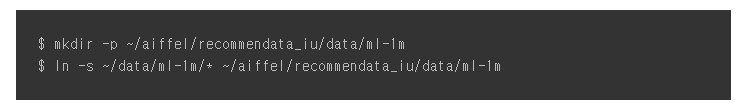

### 1) 데이터 준비와 전처리

Movielens 데이터는 rating.dat 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있습니다.

In [129]:
import os
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [130]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [131]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [132]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### 2) 분석해 봅시다.

In [133]:
# 유나크한 영화 수
ratings['movie_id'].nunique()

3628

In [134]:
#유니크한 사용자 수
ratings['user_id'].nunique()

6039

In [135]:
#유니크한 영화 제목 수 
movies['title'].nunique()

3883

In [136]:
#평점과 제목 데이터프레임 합치기
movie_data = pd.merge(ratings, movies, how = 'left', on = 'movie_id')
movie_data.head()

,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [137]:
#사용하지 않는 컬럼 제거
movie_data = movie_data.drop(columns=['timestamp', 'movie_id', 'genre'])
movie_data.head()

,user_id,counts,title
0,1,5,One Flew Over the Cuckoo's Nest (1975)
1,1,3,James and the Giant Peach (1996)
2,1,3,My Fair Lady (1964)
3,1,4,Erin Brockovich (2000)
4,1,5,"Bug's Life, A (1998)"


In [138]:
#가장 인기 있는 영화 30개(인기순)
movie_count = movie_data.groupby('title')['user_id'].count()
movie_count.sort_values(ascending=False).head(30)

title
American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Pr

### 3) 내가 선호하는 영화를 5가지 골라서 ratings에 추가해 줍시다.

In [139]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['the Intern (2013)' , 'hidden figures (2016)' ,'notting hill (1999)' ,'about time (2013)' ,'Toy Story (1995)']

# 'bukyong'이라는 user_id가 위 영화의 평점을 5점씩 줌
my_rating = pd.DataFrame({'user_id': ['bukyong']*5, 'title': my_favorite, 'counts':[5]*5})

if not movie_data.isin({'user_id':['bukyong']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    movie_data = movie_data.append(my_rating , ignore_index = True)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

movie_data.tail(20)       # 잘 추가되었는지 확인해 봅시다.


,user_id,counts,title
836463,6040,5,Seven Samurai (The Magnificent Seven) (Shichin...
836464,6040,4,Blade Runner (1982)
836465,6040,5,Sleeper (1973)
836466,6040,4,Thirty-Two Short Films About Glenn Gould (1993)
836467,6040,3,Dangerous Liaisons (1988)
836468,6040,3,Dune (1984)
836469,6040,5,"Last Temptation of Christ, The (1988)"
836470,6040,5,Saving Private Ryan (1998)
836471,6040,4,Monty Python's Life of Brian (1979)
836472,6040,4,Reservoir Dogs (1992)


In [140]:
#고유한 유저와 영화 리스트 확인
user_unique = movie_data['user_id'].unique()
title_unique = movie_data['title'].unique()

print('user_unique:', user_unique)
print('title_unique:', title_unique)

user_unique: [1 2 3 ... 6039 6040 'bukyong']
title_unique: ["One Flew Over the Cuckoo's Nest (1975)"
 'James and the Giant Peach (1996)' 'My Fair Lady (1964)' ...
 'hidden figures (2016)' 'notting hill (1999)' 'about time (2013)']


In [142]:
#유저, 타이틀 인덱싱
user_idx = {v:k for k,v in enumerate(user_unique)}
title_idx = {v:k for k,v in enumerate(title_unique)}

#인덱싱 확인
print(user_idx['bukyong']) 
print(title_idx['about time (2013)'])

6039
3631


In [143]:
#데이터 칼럼 값을 인덱싱 값으로 변경

#user_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구함. 
#혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거. 
temp_user_data = movie_data['user_id'].map(user_idx.get).dropna()
if len(temp_user_data) == len(movie_data):   #모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    movie_data['user_id'] = temp_user_data   #movie_data['user_id']을 인덱싱 된 Series로 교체. 
else:
    print('user_id column indexing Fail!!')

#temp_title_data을 통해 title 컬럼도 동일한 방식으로 인덱싱. 
temp_title_data = movie_data['title'].map(title_idx.get).dropna()
if len(temp_title_data) == len(movie_data):
    print('title column indexing OK!!')
    movie_data['title'] = temp_title_data
else:
    print('title column indexing Fail!!')

movie_data

user_id column indexing OK!!
title column indexing OK!!


,user_id,counts,title
0,0,5,0
1,0,3,1
2,0,3,2
3,0,4,3
4,0,5,4
...,...,...,...
836478,6039,5,3628
836479,6039,5,3629
836480,6039,5,3630
836481,6039,5,3631


### 4) CSR matrix를 직접 만들어 봅시다

In [144]:
movie_data['counts']

0         5
1         3
2         3
3         4
4         5
         ..
836478    5
836479    5
836480    5
836481    5
836482    5
Name: counts, Length: 836483, dtype: int64

In [145]:
from scipy.sparse import csr_matrix

num_user = movie_data['user_id'].nunique()
num_movie = movie_data['title'].nunique()

csr_data = csr_matrix((movie_data['counts'], (movie_data.user_id, movie_data.title)), shape=(num_user, num_movie))
csr_data





<6040x3632 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

### 5) als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련시켜 봅시다.

In [146]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

#implicit 라이브러리에서 권장하고 있는 부분이며 학습 내용과는 무관
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [147]:
#Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)


In [148]:
#als 모델은 input으로 item X user 꼴의 matrix를 받기 때문에 Transpose 해 줌.
csr_data_transpose = csr_data.T
csr_data_transpose

<3632x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [149]:
#모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

### 6) 내가 선호하는 5가지 영화 중 하나와 그 외의 영화 하나를 골라 훈련된 모델이 예측한 나의 선호도를 파악해 보세요.

In [150]:
bukyong, notting_hill = user_idx['bukyong'], title_idx['notting hill (1999)']
bukyong_vector, notting_hill_vector = als_model.user_factors[bukyong], als_model.item_factors[notting_hill]



In [151]:
#나의 벡터
bukyong_vector

array([-0.07654896,  0.2674367 ,  0.005698  ,  0.2388319 ,  0.1351156 ,
        0.02725064, -0.06601104, -0.30208108, -0.0084477 ,  0.31532416,
        0.06044199,  0.11308356,  0.17529246, -0.11992133, -0.39519688,
        0.03077536, -0.09168679,  0.11906601, -0.03690688,  0.11302736,
       -0.04976846, -0.48644933, -0.8165206 ,  0.0240469 ,  0.12549008,
        0.26818803,  0.49637267,  0.14265472,  0.21848351,  0.06332927,
        0.3425126 , -0.33302924,  0.11793309, -0.033319  ,  0.06246625,
       -0.04368909, -0.01349765, -0.33135575,  0.32927415,  0.25903913,
        0.11375345, -0.08312475,  0.02498967, -0.2734936 ,  0.2692293 ,
       -0.12606053, -0.07400323, -0.31302607, -0.22670531,  0.11862882,
        0.47736436,  0.0716792 ,  0.0227528 , -0.18276584, -0.02918508,
       -0.0964074 ,  0.3310728 ,  0.05100283, -0.32955143, -0.02442699,
       -0.06005857,  0.3865798 , -0.22177303, -0.19182472,  0.11604504,
       -0.5158548 ,  0.41204643,  0.12499362,  0.16809371,  0.11

In [152]:
#영화 토이 스토리 벡터
notting_hill_vector

array([ 6.87436550e-05,  1.35332346e-04,  9.25220447e-05,  9.42140687e-05,
        8.61913795e-05, -3.35939294e-05, -1.98962498e-05,  2.37663380e-06,
        8.54408936e-05,  1.81747615e-04,  1.25558814e-04,  1.32481029e-04,
        1.22227299e-04,  4.88113365e-05, -1.09013941e-04,  1.64219382e-04,
        3.68782239e-05,  1.15317067e-04, -1.64767286e-07,  1.33512149e-04,
        5.36407279e-05, -1.82459931e-04, -2.71096942e-04,  1.00538033e-04,
        2.92459263e-05,  1.72209839e-04,  2.59765075e-04,  1.24008337e-04,
        3.00697749e-04,  1.92043037e-04,  1.50170745e-04,  8.28156590e-06,
        1.22392754e-04,  5.71529199e-05,  2.29229699e-04, -3.52453321e-06,
        4.33308523e-05,  1.11977053e-04,  2.76267441e-04,  1.81556723e-04,
        8.25524548e-05, -3.63404615e-05,  2.15856897e-04, -1.11141570e-04,
        2.69455340e-04, -3.50116752e-05,  3.05643771e-05,  7.82317584e-05,
       -7.56578156e-05,  6.11331052e-05,  1.51247645e-04, -7.05788334e-05,
        8.45848990e-05, -

In [153]:
#나의 벡터와 영화 노팅힐 벡터 내적
np.dot(bukyong_vector, notting_hill_vector)

0.0024083443

In [154]:
matrix = title_idx['Sleeper (1973)']
matrix_vector = als_model.item_factors[matrix]
np.dot(bukyong_vector, matrix_vector)

-0.014453584

### 7) 내가 좋아하는 영화와 비슷한 영화를 추천받아 봅시다.

In [155]:
#내가 선호하는 영화 5편에 대해 전부 적용해 보고자 영화 추천 함수로 따로 만듦

idx_title = {v:k for k,v in title_idx.items()}



def get_similar_movie(title_name: str):
    title_id = title_idx[title_name]
    
    #(movie idx, 유사도) 형식의 튜플 생성
    similar_title = als_model.similar_items(title_id, N = 15)
    
    #movie_to_idx 를 뒤집어, index로부터 movie 이름을 얻는 dict를 생성
    similar_title = [idx_title[i[0]] for i in similar_title]
    
    return similar_title

In [156]:
get_similar_movie('the Intern (2013)')

['the Intern (2013)',
 'notting hill (1999)',
 'about time (2013)',
 'hidden figures (2016)',
 'Toy Story (1995)',
 'Toy Story 2 (1999)',
 '24 7: Twenty Four Seven (1997)',
 'Temptress Moon (Feng Yue) (1996)',
 'Captives (1994)',
 'Nowhere (1997)',
 'Number Seventeen (1932)',
 'One Night Stand (1997)',
 'Century (1993)',
 "Another Man's Poison (1952)",
 'Daens (1992)']

In [157]:
get_similar_movie('Toy Story (1995)')

['Toy Story (1995)',
 'Toy Story 2 (1999)',
 'hidden figures (2016)',
 'about time (2013)',
 'the Intern (2013)',
 'notting hill (1999)',
 'Aladdin (1992)',
 'Babe (1995)',
 "Bug's Life, A (1998)",
 'Groundhog Day (1993)',
 'Pleasantville (1998)',
 'Lion King, The (1994)',
 'Beauty and the Beast (1991)',
 "There's Something About Mary (1998)",
 'Forrest Gump (1994)']

In [ ]:
#y_favorite = ['the Intern (2013)' , 'hidden figures (2016)' ,'notting hill (1999)' ,'about time (2013)' ,'Toy Story (1995)']

In [158]:
get_similar_movie('hidden figures (2016)')

['hidden figures (2016)',
 'about time (2013)',
 'the Intern (2013)',
 'notting hill (1999)',
 'Toy Story (1995)',
 'Toy Story 2 (1999)',
 "Bug's Life, A (1998)",
 'Babe (1995)',
 'Aladdin (1992)',
 'Mad Love (1995)',
 'Temptress Moon (Feng Yue) (1996)',
 'Better Than Chocolate (1999)',
 'Silent Fall (1994)',
 'One Night Stand (1997)',
 'Good Mother, The (1988)']

In [159]:
get_similar_movie('about time (2013)')

['about time (2013)',
 'hidden figures (2016)',
 'the Intern (2013)',
 'notting hill (1999)',
 'Toy Story (1995)',
 'Toy Story 2 (1999)',
 'Temptress Moon (Feng Yue) (1996)',
 'One Night Stand (1997)',
 'Silent Fall (1994)',
 'Captives (1994)',
 '24 7: Twenty Four Seven (1997)',
 'With Friends Like These... (1998)',
 'Nowhere (1997)',
 "Bug's Life, A (1998)",
 'Impact (1949)']

### 8) 내가 가장 좋아할 만한 영화들을 추천받아 봅시다.

In [160]:
user = user_idx['bukyong']

#recommend에서는 user*item CSR Matrix를 받음.
title_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
for i in title_recommended: 
    print("{} {:08.3f}".format(idx_title[i[0]], i[1]))

Toy Story 2 (1999) 0000.446
Bug's Life, A (1998) 0000.265
Babe (1995) 0000.256
Aladdin (1992) 0000.212
Groundhog Day (1993) 0000.169
Forrest Gump (1994) 0000.146
Lion King, The (1994) 0000.133
Beauty and the Beast (1991) 0000.130
Shakespeare in Love (1998) 0000.123
Pleasantville (1998) 0000.113
There's Something About Mary (1998) 0000.100
Mask, The (1994) 0000.095
October Sky (1999) 0000.087
Wrong Trousers, The (1993) 0000.083
Election (1999) 0000.080
My Cousin Vinny (1992) 0000.078
Santa Clause, The (1994) 0000.077
Chicken Run (2000) 0000.076
Nightmare Before Christmas, The (1993) 0000.074
Matrix, The (1999) 0000.071


In [161]:
#사용자의 기록(선호하는 영화)이 특정 영화 추천에 기여한 정도
recommended = title_idx['Lion King, The (1994)']
explain = als_model.explain(user, csr_data, itemid=recommended)

[(idx_title[i[0]], i[1]) for i in explain[1]]

[('Toy Story (1995)', 0.1297507997015759),
 ('about time (2013)', 0.00038692001347553207),
 ('notting hill (1999)', 0.00038506543155555136),
 ('hidden figures (2016)', 0.0003751941738748855),
 ('the Intern (2013)', 0.0003587223809445308)]